In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cd /content/drive/MyDrive/hw_code_logistic_regression/

/content/drive/MyDrive/hw_code_logistic_regression


In [12]:
from check_grad import check_grad
import numpy as np
from matplotlib import pyplot as plt
from utils import *

#### REQUIREMENTS
* python >= 3.6
* numpy
* matplotlib

python 3.6 이상의 버전을 설치 후 `pip install numpy matplotlib` 커맨드 입력

# 기계학습 2022년 2학기
## 과제 \#2 Logistic Regression 프로그래밍

이번 과제에서는 손으로 쓴 숫자 __2__와 __8__ 2개의 클래스를 인식하는 분류기를 만드는 것이다. 아래 [Logistic Regression](#logistic_regression), [Regularized Logistic Regression](#regularized_logistic_regression) section의 문제를 읽고 logistic regression 기반 분류기를 구현하시오.

#### 데이터 집합
제공되는 데이터들은 손글씨 숫자 이미지를 저장한 28x28 배열들로 구성되어 있다.
훈련용 데이터 집합은 `mnist_train`과 `mnist_train_small`을 제공한다.

`mnist_train`은 클래스별로 100개의 예제를 가지고 있으며 `mnist_train_small`은 클래스별로 5개의 예제를 가지고 있다.
`mnist_valid`는 클래스별로 25개의 예제를 가지고 있으며, validation 용도로 사용된다.
그리고 `mnist_test`는 분류기의 성능을 평가하기 위한 테스트 데이터 집합이다.
데이터들은 Python 용 데이터 binary인 `*.npz` 포맷으로 되어 있다.

아래 셀들을 실행하여 각 데이터 집합에 속한 예제가 어떻게 생겼는지 파악할 수 있다. 이미지 위의 title 은 `데이터 번호: 숫자`로 이루어져 있다. 필요에 따라 데이터 확인 후 셀을 지워 전체 코드 실행 속도를 높일 수 있다.

In [13]:
def show_digits(random_indices, inputs, targets, classes=['2', '8']):
    digit_samples = inputs[random_indices.ravel()]
    target_samples = targets[random_indices.ravel()]
    
    figs, axes = plt.subplots(
        nrows=random_indices.shape[0],
        ncols=random_indices.shape[1],
        constrained_layout=True
    )
    iterator = zip(
        axes.ravel(), digit_samples, target_samples, random_indices.ravel()
    )
    for axis, digit, target, index in iterator:
        axis.axis('off')
        axis.imshow(digit.reshape(28, 28), cmap='gray')
        axis.set_title(f'{index}: {classes[target.squeeze().astype(int)]}')
    plt.show()

##### MNIST train small

Shape of input array: (10, 784)
Shape of target array: (10, 1)


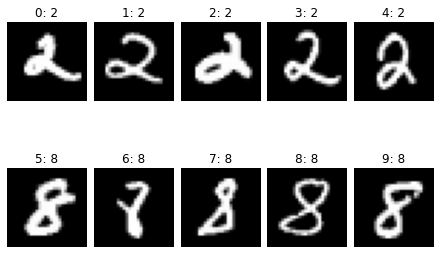

In [14]:
plot_shape = (2, 5)
inputs, targets = print_data_stat('mnist_train_small')
indices = np.arange(inputs.shape[0]).reshape(plot_shape)
show_digits(indices, inputs, targets)

##### MNIST train

Shape of input array: (200, 784)
Shape of target array: (200, 1)


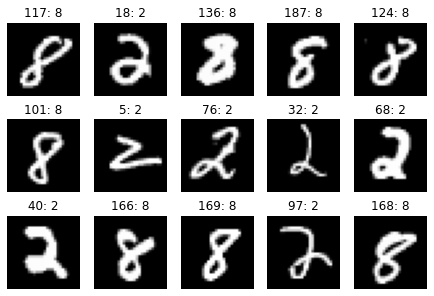

In [15]:
plot_shape = (3, 5)
inputs, targets = print_data_stat('mnist_train')
N = inputs.shape[0]
show_digits(random_rectangular_indices(N, *plot_shape), inputs, targets)

##### MNIST valid

Shape of input array: (50, 784)
Shape of target array: (50, 1)


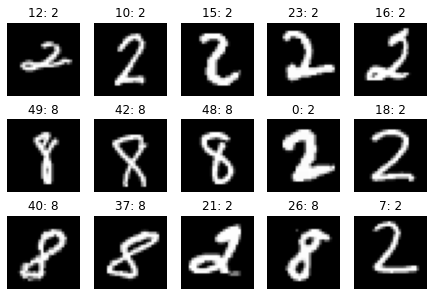

In [16]:
plot_shape = (3, 5)
inputs, targets = print_data_stat('mnist_valid')
N = inputs.shape[0]
show_digits(random_rectangular_indices(N, *plot_shape), inputs, targets)

##### MNIST test

Shape of input array: (50, 784)
Shape of target array: (50, 1)


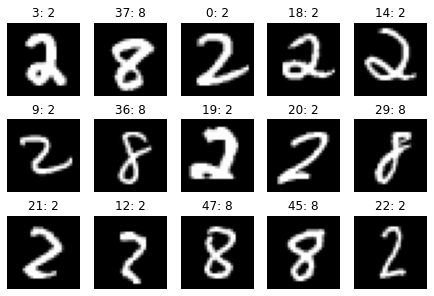

In [17]:
plot_shape = (3, 5)
inputs, targets = print_data_stat('mnist_test')
N = inputs.shape[0]
show_digits(random_rectangular_indices(N, *plot_shape), inputs, targets)

<a id='logistic_regression'></a>
#### Logistic Regression
    
1. 수업 시간에 배운 logistic regression을 이용한 분류기를 Python으로 작성하시오. 최적화(또는 훈련)는 gradient descent 방법을 이용한다. 훈련 도중에 `NaN` 또는 `Inf` 에러가 발생하면 learning rate를 줄이거나 초기 weight 값을 작게 설정하는 방법이 도움이 된다. 테스트 데이터는 반드시 validation 집합을 이용해서 최적의 hyperparameter를 결정한 후 마지막 단계에서 분류기의 성능을 평가할 때만 사용한다.

2. 최적의 hyperparameter가 결정된 후 모델을 이용한 훈련 과정 동안 error가 어떻게 변하는지 그래프로 보이시오. `mnist_train`과 `mnist_train_small`의 두 종류 데이터 집합 각각에 대해 그래프를 그려야 한다. 또한 결과에 대해 분석하고 평가하시오. 훈련을 여러 번 반복하고 그때 분류기 성능이 같은지 다른지, 그 이유는 무엇인지 분석하시오.

<a id='regularized_logistic_regression'></a>
#### Regularized Logistic Regression

위에서 작성한 Logistic Regression 코드를 변경하여 Regularized Logistic Regression 기반 분류기를 작성하시오. 함수 `logistic_pen`에서
loss function과 gradient를 계산하는 방법을 수정해야 할 것이다.
Regularization strength $\lambda$는 {0.001, 0.01, 0.1, 1.0}의 네 가지 경우를 고려한다.
테스트 집합은 반드시 validation 집합을 이용해 위의 $\lambda$ 중 최적이 결정된 후 마지막 단계에서 성능 평가용으로만 사용한다.

1. [Logistic Regression](#logistic_regression).2 와 같이 그래프를 그리시오.
2. 다른 hyperparameter 들을 모두 고정한 상태에서 $\lambda$에 따라 분류기의 성능이 어떻게 달라지는지 분석하시오.
3. [Logistic Regression](#logistic_regression) 기법과 성능을 비교하고 성능 차이에 대해 분석하시오.


#### Stem code

아래 코드는 logistic regression 기반 classifier를 구현하기 위한 주요 함수들이다.
각 함수의 빠진 부분을 작성하시오.

In [18]:
def logistic_predict(weights, data):
    """
    Compute the probabilities predicted by the logistic classifier.

    Note: N is the number of examples and 
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to the bias (intercepts).
        data:       N x M data matrix where each row corresponds 
                    to one data point.
    Outputs:
        y:          :N x 1 vector of probabilities of being second class. This is the output of the classifier.
    """
    # TODO: Finish this function
    y = np.dot(data, weights[0:-1]) + weights[-1]
    y = sigmoid(y)



    
    return y

In [19]:
def evaluate(targets, y):
    """
    Compute evaluation metrics.
    Inputs:
        targets : N x 1 vector of targets.
        y       : N x 1 vector of probabilities.
    Outputs:
        ce           : (scalar) Cross entropy. CE(p, q) = E_p[-log q]. Here we want to compute CE(targets, y)
        frac_correct : (scalar) Fraction of inputs classified correctly.
    """
    # TODO: Finish this function
    ce = (-targets * np.log(y)-(1-targets) * np.log(1-y)).mean()
    y = y.round()
    frac_correct = np.sum(y==targets).astype(int)/len(y)


    return ce, frac_correct

In [20]:
def logistic(weights, data, targets, hyperparameters):
    """
    Calculate negative log likelihood and its derivatives with respect to weights.
    Also return the predictions.

    Note: N is the number of examples and 
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to bias (intercepts).
        data:       N x M data matrix where each row corresponds 
                    to one data point.
        targets:    N x 1 vector of targets class probabilities.
        hyperparameters: The hyperparameters dictionary.

    Outputs:
        f:       The sum of the loss over all data points. This is the objective that we want to minimize.
        df:      (M+1) x 1 vector of accumulative derivative of f w.r.t. weights, i.e. don't need to average over number of sample
        y:       N x 1 vector of probabilities.
    """

    y = logistic_predict(weights, data)

    if hyperparameters['weight_regularization'] is True:
        f, df = logistic_pen(weights, data, targets, hyperparameters)
    else:
        # TODO: compute f and df without regularization
        f = np.sum((-targets * np.log(y)-(1-targets)*np.log(1-y)))
        y = y.round()

        dy = y-targets
        
        df = np.zeros_like(weights)
        df[0:-1] += np.dot(data.T, dy)
        df[-1] += np.sum(dy)

        
    return f, df, y

In [21]:
def logistic_pen(weights, data, targets, hyperparameters):
    """
    Calculate negative log likelihood and its derivatives with respect to weights.
    Also return the predictions.

    Note: N is the number of examples and
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to bias (intercepts).
        data:       N x M data matrix where each row corresponds
                    to one data point.
        targets:    N x 1 vector of targets class probabilities.
        hyperparameters: The hyperparameters dictionary.

    Outputs:
        f:             The sum of the loss over all data points. This is the objective that we want to minimize.
        df:            (M+1) x 1 vector of accumulative derivative of f w.r.t. weights, i.e. don't need to average over number of sample
    """

    # TODO: Finish this function
    y = logistic_predict(weights, data)
    
    f = np.sum(-targets * np.log(y)-(1-targets)*np.log(1-y))+0.5 * hyperparameters['weight_decay'] * np.sum(weights * weights)
    dy = y - targets


    
    df = np.zeros((len(weights),1))
    df[0:-1] += np.dot(data.T, dy) + hyperparameters['weight_decay'] * np.sum(weights * weights)
    df[-1] += np.sum(dy)
    
    return f, df

#### Training/test code

아래는 logistic regression 기반 classifier를 훈련 및 테스트 하기 위한 코드이다.
각 함수에서 빠진 부분을 작성하시오.
필요에 따라 새로운 함수들을 작성해도 된다.

#### Practice guide

* `utils.py` 파일에는 각 데이터 집합을 불러올 수 있는 함수들이 정의되어 있다.
* 훈련을 진행하기 전 `check_grad.py` 파일의 `check_grad` 함수를 사용하여 작성한 코드가 잘 작동하는지 확인할 수 있다. 이는 아래 명시된 `run_check_grad` 함수에 의해 실행되며, `diff` 값이 0에 가까운 아주 작은 양수여야 한다. ex) 5e-8
* weight를 random으로 초기화 하면 실행마다 결과가 달라진다. 분석을 위해 일관된 결과를 얻고 싶다면 `np.random.seed` 함수를 사용하면 된다. (예: `np.random.seed(1234)`) 이 경우, 매 실행 마다 jupyter 커널을 완전히 재실행 하여야 한다.
* Plot은 matplotlib 패키지의 pyplot 모듈을 사용한다. y축에 loss 혹은 accuracy 정보를 출력하고 x축에 iteration 정보를 출력하면 된다. 아래는 plot 예제이며, 아래와 같은 layout으로 plot을 구성하기 바란다.

![plot sample](./plot_sample.png)

In [25]:
def train(hyperparameters):
    print_interval = hyperparameters.setdefault('print_interval', 1)
    if hyperparameters['mnist_train_small']:
        train_inputs, train_targets = load_train_small()
    else:
        train_inputs, train_targets = load_train()

    valid_inputs, valid_targets = load_valid()

    # N is number of examples; M is the number of features per example.
    N, M = train_inputs.shape

    # Logistic regression weights
    # TODO:Initialize to random weights here.
    weights = 0.01 * np.random.randn(M+1,1)

    # Verify that your logistic function produces the right gradient.
    # diff should be very close to 0.
    run_check_grad(hyperparameters)

    # Begin learning with gradient descent
    logging = np.zeros((hyperparameters['num_iterations'], 5))
    for t in range(hyperparameters['num_iterations']):

        # Find the negative log likelihood and its derivatives w.r.t. the weights.
        f, df, predictions = logistic(weights, train_inputs, train_targets, hyperparameters)
        
        # Evaluate the prediction.
        cross_entropy_train, frac_correct_train = evaluate(train_targets, predictions)

        if np.isnan(f) or np.isinf(f):
            raise ValueError("nan/inf error")

        # update parameters
        weights = weights - hyperparameters['learning_rate'] * df / N

        # Make a prediction on the valid_inputs.
        predictions_valid = logistic_predict(weights, valid_inputs)

        # Evaluate the prediction.
        cross_entropy_valid, frac_correct_valid = evaluate(valid_targets, predictions_valid)
        
        # store stats
        logging[t] = [f / N, cross_entropy_train, frac_correct_train*100, cross_entropy_valid, frac_correct_valid*100]
        
        # print some stats
        if t % print_interval != 0:
            continue
        print(f"ITERATION:{t+1:4d}  "
              f"TRAIN NLOGL:{f / N:4.2f}  "
              f"TRAIN CE:{cross_entropy_train:.6f}  "
              f"TRAIN FRAC:{frac_correct_train*100:5.1f}  "
              f"VALID CE:{cross_entropy_valid:.6f}   "
              f"VALID FRAC:{frac_correct_valid*100:5.1f}")
        
    return logging, weights

def run_check_grad(hyperparameters):
    """Performs gradient check on logistic function.
    """

    # This creates small random data with 7 examples and 
    # 9 dimensions and checks the gradient on that data.
    num_examples = 7
    num_dimensions = 9

    weights = np.random.randn(num_dimensions+1, 1)
    data    = np.random.randn(num_examples, num_dimensions)
    targets = (np.random.rand(num_examples, 1) > 0.5).astype(int)

    diff = check_grad(logistic,      # function to check
                      weights,
                      0.001,         # perturbation
                      data,
                      targets,
                      hyperparameters)

    print("diff =", diff)

In [28]:
def run_train(hyperparameters):
    # average over multiple runs
    num_runs = 1
    weights = []
    logging = np.zeros((hyperparameters['num_iterations'], 5))
    for i in range(num_runs):
        _logging, _weights = train(hyperparameters)
        logging += _logging
        weights.append(_weights)
    logging /= num_runs

    # TODO generate plots
    train_loss = logging[:,1]
    val_loss = logging[:,3]
    train_acc = logging[:,2]
    val_acc = logging[:,4]

    plt.subplot(1, 2, 1)
    plt.plot(train_loss,'r',label = 'training')
    plt.plot(val_loss,'b', label = 'valiation')
    plt.ylabel('loss')
    plt.xlim([1,hyperparameters['num_iterations']])

    plt.subplot(1, 2, 2) 
    plt.plot(train_acc,'r',label = 'training')
    plt.plot(val_acc,'b', label = 'valiation')
    plt.ylabel('acc')
    plt.xlim([1,hyperparameters['num_iterations']])

    plt.legend(loc='upper right')
    plt.show()
    
    return logging, weights

def run_test(weights: list):
    inputs, targets = load_test()
    
    for i, weight in enumerate(weights, 1):
        predictions = logistic_predict(weight, inputs)
        cross_entropy, frac_correct = evaluate(targets, predictions)
        print(f'WEIGHTS #{i}   TEST CE: {cross_entropy:.6f}   TEST FRAC: {frac_correct*100:5.1f}')

diff = 0.006055276448032059
ITERATION:   1  TRAIN NLOGL:0.68  TRAIN CE:0.684851  TRAIN FRAC: 54.0  VALID CE:0.682684   VALID FRAC: 50.0
ITERATION:   2  TRAIN NLOGL:0.68  TRAIN CE:0.683780  TRAIN FRAC: 55.5  VALID CE:0.681815   VALID FRAC: 50.0
ITERATION:   3  TRAIN NLOGL:0.68  TRAIN CE:0.682714  TRAIN FRAC: 56.0  VALID CE:0.680951   VALID FRAC: 50.0
ITERATION:   4  TRAIN NLOGL:0.68  TRAIN CE:0.681654  TRAIN FRAC: 56.0  VALID CE:0.680093   VALID FRAC: 50.0
ITERATION:   5  TRAIN NLOGL:0.68  TRAIN CE:0.680600  TRAIN FRAC: 57.5  VALID CE:0.679239   VALID FRAC: 50.0
ITERATION:   6  TRAIN NLOGL:0.68  TRAIN CE:0.679550  TRAIN FRAC: 58.0  VALID CE:0.678390   VALID FRAC: 50.0
ITERATION:   7  TRAIN NLOGL:0.68  TRAIN CE:0.678506  TRAIN FRAC: 59.0  VALID CE:0.677546   VALID FRAC: 50.0
ITERATION:   8  TRAIN NLOGL:0.68  TRAIN CE:0.677467  TRAIN FRAC: 60.5  VALID CE:0.676707   VALID FRAC: 52.0
ITERATION:   9  TRAIN NLOGL:0.68  TRAIN CE:0.676433  TRAIN FRAC: 62.0  VALID CE:0.675873   VALID FRAC: 58.0


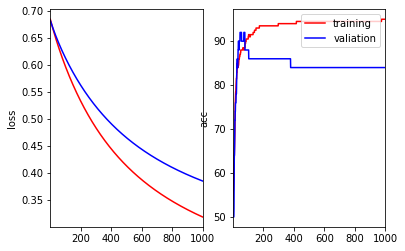

In [29]:
hyperparameters = {
    'mnist_train_small': False, # boolean, True for using small dataset
    'learning_rate': 0.001,
    'weight_regularization': True, # boolean, True for using regularization
    'num_iterations': 1000,
    'weight_decay': 0.001, # regularization strength lambda
    'print_interval': 1 # adjust print interval higher if the number of iterations is large. not affects logging
}

logging, trained_weights = run_train(hyperparameters)

In [27]:
run_test(trained_weights)

WEIGHTS #1   TEST CE: 0.367088   TEST FRAC:  90.0
